In [156]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D

In [136]:
mech_df = pd.read_excel('mech_properties.xlsx', index_col=None)
higgs_df = pd.read_csv('data.csv', index_col=None)
cols = [mech_df.columns[1],mech_df.columns[2],mech_df.columns[3],mech_df.columns[4],mech_df.columns[5]]

In [98]:
mech_df

,Material Name,Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%)
0,Acetate,1.35,1.30,30.00,37.500,7.00
1,Acrylic,1.16,2.80,27.50,44.000,2.00
2,Alpaca,1.30,1.60,45.00,2.700,15.00
3,Aramid,1.44,27.50,3.50,750.000,5.00
4,Carbon,1.79,11.30,1.60,290.000,0.00
5,Cotton,1.54,4.00,7.50,9.250,8.50
6,Elastane/Spandex,1.15,1.00,600.00,0.000,1.30
7,Flax,1.38,5.15,3.00,53.500,12.00
8,Glass,2.50,6.60,2.50,69.000,0.00
9,Hemp,1.48,6.30,3.05,64.000,12.00


In [137]:
mat_const_names = []
for i in range(0,len(higgs_df)):
    words = higgs_df['Material Constituent'].iloc[i]
    words = words.replace(',',' ')
    words = words.split()
    if np.isin("fabric",words):
        words.remove("fabric")
    if np.isin("fabric;",words):
        words.remove("fabric;")
    if np.isin("fabric;",words):
        words.remove("fabric;")
    if np.isin("Fabric;",words):
        words.remove("Fabric;")
    if np.isin("fiber",words):
        words.remove("fiber") 
    if np.isin("(PU)",words):
        words.remove("(PU)")
    if np.isin("(PTT)",words):
        words.remove("(PTT)")
    if np.isin("(PLA)",words):
        words.remove("(PLA)")
    if np.isin("(PP)",words):
        words.remove("(PP)")
    if np.isin("(PP)",words):
        words.remove("(PP)")
    if np.isin("Acid",words):
        words.remove("Acid")
    if np.isin("terephthalate",words):
        words.remove("terephthalate")
    mat_const_names.append(words)

In [ ]:
mat_const_names

In [138]:
temp = 0.5 * mech_df[mech_df['Material Name'] == mat_const_names[0][0]].iloc[:,[1,2,3,4,5]].to_numpy() + 0.5 * mech_df[mech_df['Material Name'] == mat_const_names[0][1]].iloc[:,[1,2,3,4,5]].to_numpy()
for i in range(1,len(higgs_df)):
    if len(mat_const_names[i]) == 3:
        value = 1/3 * mech_df[mech_df['Material Name'] == mat_const_names[i][0]].iloc[:,[1,2,3,4,5]].to_numpy() + 1/3 * mech_df[mech_df['Material Name'] == mat_const_names[i][1]].iloc[:,[1,2,3,4,5]].to_numpy() + 1/3 * mech_df[mech_df['Material Name'] == mat_const_names[i][2]].iloc[:,[1,2,3,4,5]].to_numpy() 
    elif len(mat_const_names[i]) == 2:
        value = 0.5 * mech_df[mech_df['Material Name'] == mat_const_names[i][0]].iloc[:,[1,2,3,4,5]].to_numpy() + 0.5 * mech_df[mech_df['Material Name'] == mat_const_names[i][1]].iloc[:,[1,2,3,4,5]].to_numpy() 
    elif  len(mat_const_names[i]) == 1:      
        value = mech_df[mech_df['Material Name'] == mat_const_names[i][0]].iloc[:,[1,2,3,4,5]].to_numpy()
    temp = np.concatenate((temp,value),axis=0)   


In [139]:
new1 = pd.DataFrame(data=temp, columns=cols)

In [140]:
higgs_mech_df = pd.concat([higgs_df, new1], axis=1)   

In [104]:
higgs_mech_df

,Unnamed: 0,Material Name,Material Constituent,Material Score,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%)
0,38,Material 1,"Acetate, Triacetate fabric",77.925781,17.314667,18.353474,12.697838,17.861764,19.753816,10.297696,0.341781,933.186768,1.335000,1.275000,30.000000,21.0775,5.250000
1,100,Material 10,"Acetate, Triacetate fabric",45.299890,14.335567,15.195640,3.736524,2.231035,12.950278,12.046486,0.331001,122.994123,1.335000,1.275000,30.000000,21.0775,5.250000
2,24,Material 100,Modal fabric,20.925190,3.749701,3.974667,2.764164,1.102020,3.390025,9.919279,0.440903,104.433599,1.520000,4.000000,10.000000,5.5500,13.000000
3,174,Material 101,Modal fabric,86.645584,29.129040,30.876659,14.302227,5.250654,24.450543,13.513120,0.489023,400.099937,1.520000,4.000000,10.000000,5.5500,13.000000
4,99,Material 102,Modal fabric,33.367600,6.750911,7.155937,4.554193,1.733674,6.314907,14.013914,0.454445,140.080222,1.520000,4.000000,10.000000,5.5500,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,184,Material BL5,Cotton fabric; Polyester fabric,73.482283,10.714565,11.357393,10.786663,29.570568,11.270745,11.139742,0.317030,1473.253264,1.465000,4.250000,15.000000,5.8000,4.450000
180,70,Material BL6,Cotton fabric; Elastane/Spandex fabric; Nylon...,67.963689,14.362419,15.224103,8.865578,18.116909,15.909081,10.709702,0.190218,914.212699,1.276667,3.833333,212.500000,4.9500,4.600000
181,138,Material BL7,Cotton fabric; Polyester fabric,85.563341,14.323849,15.183219,13.222541,30.381043,14.478350,13.157559,0.320232,1518.694332,1.465000,4.250000,15.000000,5.8000,4.450000
182,31,Material BL8,Alpaca Fabric; Viscose/Rayon fabric,96.335868,25.022471,26.523713,36.466069,5.052089,16.477031,13.318208,0.505087,268.860733,1.410000,1.800000,29.250000,4.1250,14.000000


In [141]:
higgs_mech_df = higgs_mech_df[[higgs_mech_df.columns[i] for i in range(len(higgs_mech_df.columns)) if i != 0]]
higgs_mech_df.head()

,Material Name,Material Constituent,Material Score,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%)
0,Material 1,"Acetate, Triacetate fabric",77.925781,17.314667,18.353474,12.697838,17.861764,19.753816,10.297696,0.341781,933.186768,1.335,1.275,30.0,21.0775,5.25
1,Material 10,"Acetate, Triacetate fabric",45.299890,14.335567,15.195640,3.736524,2.231035,12.950278,12.046486,0.331001,122.994123,1.335,1.275,30.0,21.0775,5.25
2,Material 100,Modal fabric,20.925190,3.749701,3.974667,2.764164,1.102020,3.390025,9.919279,0.440903,104.433599,1.520,4.000,10.0,5.5500,13.00
3,Material 101,Modal fabric,86.645584,29.129040,30.876659,14.302227,5.250654,24.450543,13.513120,0.489023,400.099937,1.520,4.000,10.0,5.5500,13.00
4,Material 102,Modal fabric,33.367600,6.750911,7.155937,4.554193,1.733674,6.314907,14.013914,0.454445,140.080222,1.520,4.000,10.0,5.5500,13.00


In [142]:
non_features = ['Material Name', 'Material Constituent', 'Material Score']
material_info = higgs_mech_df[non_features]
df_X = higgs_mech_df.drop(columns=non_features)
df_X.head()

,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%)
0,17.314667,18.353474,12.697838,17.861764,19.753816,10.297696,0.341781,933.186768,1.335,1.275,30.0,21.0775,5.25
1,14.335567,15.195640,3.736524,2.231035,12.950278,12.046486,0.331001,122.994123,1.335,1.275,30.0,21.0775,5.25
2,3.749701,3.974667,2.764164,1.102020,3.390025,9.919279,0.440903,104.433599,1.520,4.000,10.0,5.5500,13.00
3,29.129040,30.876659,14.302227,5.250654,24.450543,13.513120,0.489023,400.099937,1.520,4.000,10.0,5.5500,13.00
4,6.750911,7.155937,4.554193,1.733674,6.314907,14.013914,0.454445,140.080222,1.520,4.000,10.0,5.5500,13.00


In [143]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df_X)

pca = PCA(n_components=3)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Text(0, 0.5, 'Cumulative Explained Variance')

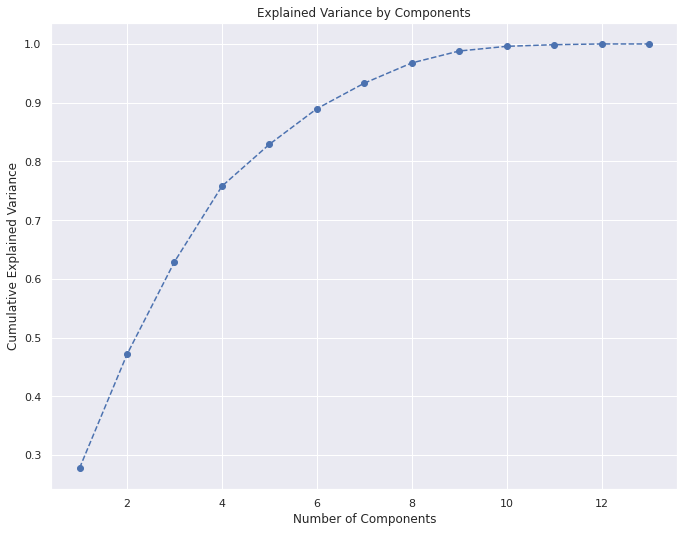

In [108]:
evr = pca.explained_variance_ratio_

plt.figure(figsize=(10,8))
plt.plot(range(1, len(df_X.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [110]:
scores_pca = pca.transform(X_std)

In [144]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

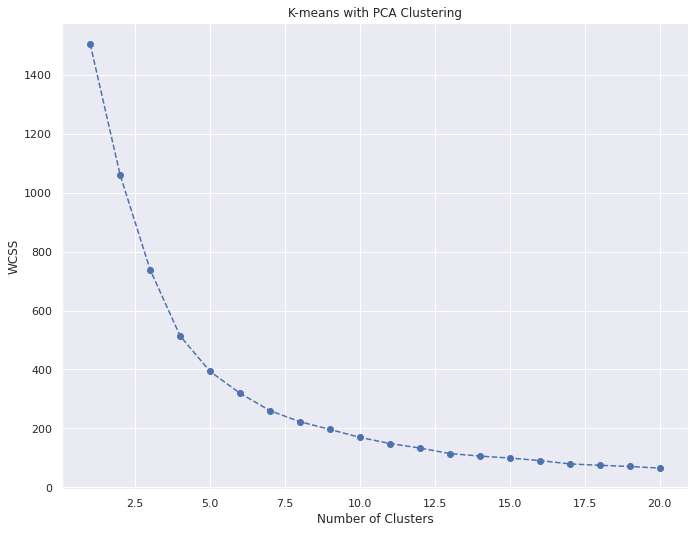

In [116]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [145]:
n_clusters = 5
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [146]:
df_seg_pca_kmeans = pd.concat([df_X.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%),Component 1,Component 2,Component 3,Cluster
0,17.314667,18.353474,12.697838,17.861764,19.753816,10.297696,0.341781,933.186768,1.335,1.275,30.0,21.0775,5.25,0.853533,-0.761629,-0.159724,4
1,14.335567,15.195640,3.736524,2.231035,12.950278,12.046486,0.331001,122.994123,1.335,1.275,30.0,21.0775,5.25,-0.176737,-0.410302,-0.715025,3
2,3.749701,3.974667,2.764164,1.102020,3.390025,9.919279,0.440903,104.433599,1.520,4.000,10.0,5.5500,13.00,-1.209249,-1.770777,0.296736,3
3,29.129040,30.876659,14.302227,5.250654,24.450543,13.513120,0.489023,400.099937,1.520,4.000,10.0,5.5500,13.00,2.428295,0.294269,0.536034,4
4,6.750911,7.155937,4.554193,1.733674,6.314907,14.013914,0.454445,140.080222,1.520,4.000,10.0,5.5500,13.00,-0.355757,-1.682300,0.223245,3


/cluster/tufts/sunterlab/coguik01/conda/condaenv/Emeka_conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


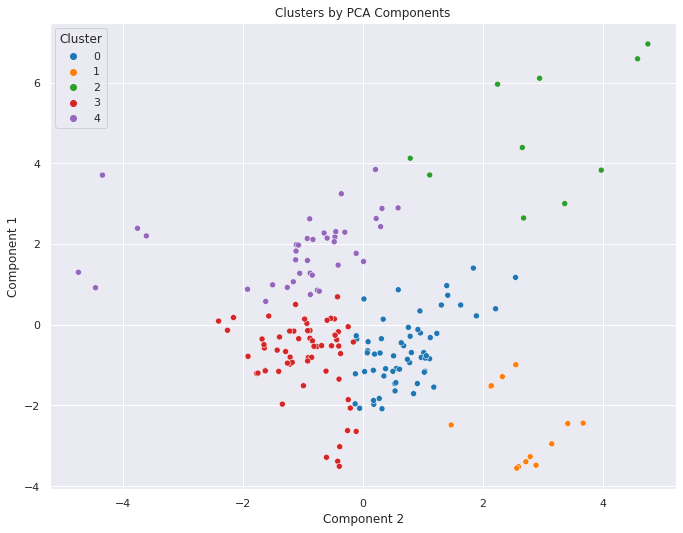

In [122]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.title('Clusters by PCA Components')
plt.show()

In [ ]:
x = df_seg_pca_kmeans['Component 2']
y = df_seg_pca_kmeans['Component 1']
plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.title('Clusters by PCA Components')
plt.show()

/cluster/tufts/sunterlab/coguik01/conda/condaenv/Emeka_conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


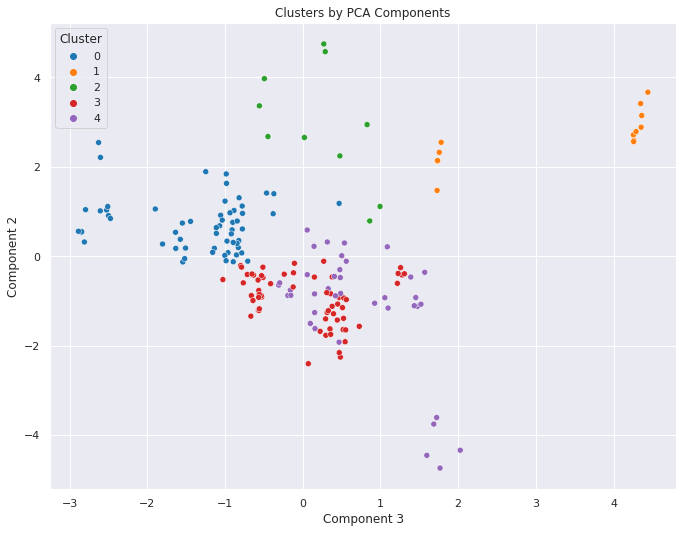

In [124]:
x = df_seg_pca_kmeans['Component 3']
y = df_seg_pca_kmeans['Component 2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=df_seg_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.title('Clusters by PCA Components')
plt.show()

In [147]:
higgs_mech_df['Cluster'] = df_seg_pca_kmeans['Cluster']

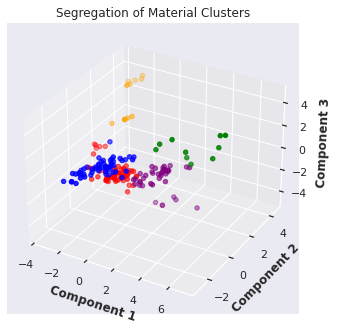

In [157]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(111, projection = '3d')

plt.title("Segregation of Material Clusters")
ax.set_xlabel('Component 1', fontweight ='bold') 
ax.set_ylabel('Component 2', fontweight ='bold') 
ax.set_zlabel('Component 3', fontweight ='bold')


colors = ['blue', 'orange', 'green', 'red', 'purple']

ax.scatter3D(df_seg_pca_kmeans['Component 1'],
           df_seg_pca_kmeans['Component 3'],
           df_seg_pca_kmeans['Component 2'], c=higgs_mech_df['Cluster'], cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [149]:
preview = higgs_mech_df.loc[higgs_mech_df['Cluster'] == 0]
print(len(preview))
preview.head(n=50)

59


,Material Name,Material Constituent,Material Score,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%),Cluster
7,Material 105,Nylon fabric,53.166941,16.829512,17.839211,4.956710,1.016488,20.029712,10.334519,0.000000,70.819484,1.140000,6.500000,30.00,5.600000,4.000000,0
9,Material 107,Nylon fabric,54.945813,15.145178,16.053825,6.284083,0.729866,18.286551,14.500134,0.000000,64.531033,1.140000,6.500000,30.00,5.600000,4.000000,0
10,Material 108,Nylon fabric,44.625719,11.991772,12.711227,7.095463,1.376135,10.891413,13.270937,0.000000,110.623022,1.140000,6.500000,30.00,5.600000,4.000000,0
11,Material 109,Nylon fabric,56.279787,14.141602,14.990038,7.003748,1.802148,15.317474,18.014815,0.000000,101.380869,1.140000,6.500000,30.00,5.600000,4.000000,0
15,Material 112,Nylon fabric,66.568165,20.203067,21.415165,8.766972,1.057969,22.967652,13.572504,0.000000,101.315602,1.140000,6.500000,30.00,5.600000,4.000000,0
16,Material 113,Nylon fabric,42.485485,10.400223,11.024192,3.449523,1.307727,11.772700,15.555312,0.000000,71.533790,1.140000,6.500000,30.00,5.600000,4.000000,0
18,Material 115,Nylon fabric,36.270135,9.400279,9.964256,3.979052,1.258334,9.328639,12.303831,0.000000,80.746264,1.140000,6.500000,30.00,5.600000,4.000000,0
19,Material 116,Polyester fabric,40.708038,11.147310,11.816101,3.559746,1.402819,14.263644,10.334519,0.000000,77.461384,1.390000,4.500000,22.50,2.350000,0.400000,0
24,Material 120,Polyester fabric,59.594312,18.734755,19.858761,7.460734,1.953417,19.713129,11.732277,0.000000,156.578453,1.390000,4.500000,22.50,2.350000,0.400000,0
25,Material 121,Polyester fabric,49.049642,14.520673,15.391852,6.718768,1.956567,12.477661,13.375972,0.000000,112.936662,1.390000,4.500000,22.50,2.350000,0.400000,0


In [151]:
preview = higgs_mech_df.loc[higgs_mech_df['Cluster'] == 1]
print(len(preview))
preview.head(n=50)


14


,Material Name,Material Constituent,Material Score,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%),Cluster
76,Material 31,Aramid fabric,32.930609,9.763615,10.349390,2.458482,0.604922,12.972362,7.131229,0.0,42.322355,1.440,27.5,3.5,750.000,5.0,1
77,Material 32,Aramid fabric,31.147688,8.908734,9.443221,3.087211,0.526226,11.494287,7.131229,0.0,36.140389,1.440,27.5,3.5,750.000,5.0,1
78,Material 33,Aramid fabric,33.640813,11.430273,12.116041,3.515876,0.937942,12.884377,4.872346,0.0,63.252143,1.440,27.5,3.5,750.000,5.0,1
79,Material 34,Aramid fabric,42.382840,14.837396,15.727577,4.615997,1.373226,15.686799,5.869422,0.0,116.709034,1.440,27.5,3.5,750.000,5.0,1
80,Material 35,Aramid fabric,30.483292,8.614502,9.131336,2.987603,0.484627,11.265332,7.131229,0.0,35.865241,1.440,27.5,3.5,750.000,5.0,1
81,Material 36,Aramid fabric,50.564557,17.678219,18.738837,5.148372,1.761019,18.980473,6.996475,0.0,138.713605,1.440,27.5,3.5,750.000,5.0,1
82,Material 37,Aramid fabric,35.910829,11.125740,11.793237,3.843186,0.875460,13.069967,6.996475,0.0,58.941981,1.440,27.5,3.5,750.000,5.0,1
83,Material 38,Aramid fabric,53.133791,20.058383,21.261801,6.445658,2.160002,19.597401,4.872346,0.0,131.877570,1.440,27.5,3.5,750.000,5.0,1
84,Material 39,Carbon fiber fabric,64.494111,18.721361,19.844564,16.601811,2.055676,23.074153,4.041109,0.0,110.395416,1.790,11.3,1.6,290.000,0.0,1
86,Material 40,Carbon fiber fabric,74.134740,23.366657,24.768558,17.745523,2.742258,26.366095,3.914207,0.0,148.534974,1.790,11.3,1.6,290.000,0.0,1


In [152]:
preview = higgs_mech_df.loc[higgs_mech_df['Cluster'] == 2]
print(len(preview))
preview.head(n=50)

10


,Material Name,Material Constituent,Material Score,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%),Cluster
6,Material 104,Modal fabric,156.659488,58.016980,61.497753,27.345392,9.014363,47.897272,14.385481,0.481301,633.856650,1.520,4.00,10.00,5.550,13.0,2
8,Material 106,Nylon fabric,114.767611,42.226490,44.759900,15.586670,4.585202,40.167523,12.201726,0.000000,274.454652,1.140,6.50,30.00,5.600,4.0,2
14,Material 111,Nylon fabric,130.398522,48.698120,51.619800,18.257733,5.387079,45.705994,12.349596,0.000000,328.509994,1.140,6.50,30.00,5.600,4.0,2
17,Material 114,Nylon fabric,107.737929,38.883089,41.215909,16.065916,5.703819,35.065085,12.020020,0.000000,640.656324,1.140,6.50,30.00,5.600,4.0,2
56,Material 152,Viscose/Rayon fabric,150.659556,53.306625,56.504797,25.503873,10.171216,43.988897,17.688945,0.473697,555.496498,1.520,2.00,13.50,5.550,13.0,2
58,Material 154,Wool fabric,114.939729,58.231912,61.725580,22.023537,3.127954,19.245147,12.311179,0.000000,169.177345,1.310,1.40,30.00,3.650,18.0,2
60,Material 156,Wool fabric,164.115244,79.776666,84.562928,29.056123,6.302127,37.828459,11.151869,0.000000,353.783230,1.310,1.40,30.00,3.650,18.0,2
63,Material 159,Wool fabric,158.429952,77.622346,82.279358,28.564127,6.171108,35.960827,10.111543,0.000000,346.482284,1.310,1.40,30.00,3.650,18.0,2
128,Material 79,Flax fiber fabric,118.863621,39.157342,41.506616,20.457655,10.835058,32.365214,16.048353,0.636891,777.951175,1.380,5.15,3.00,53.500,12.0,2
158,Material BL18,Alpaca Fabric; Polyester fabric,177.900992,43.752748,46.377727,112.659144,1.279905,10.918157,9.291038,0.308972,85.874302,1.345,3.05,33.75,2.525,7.7,2


In [153]:
preview = higgs_mech_df.loc[higgs_mech_df['Cluster'] == 3]
print(len(preview))
preview.head(n=50)

61


,Material Name,Material Constituent,Material Score,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%),Cluster
1,Material 10,"Acetate, Triacetate fabric",45.299890,14.335567,15.195640,3.736524,2.231035,12.950278,12.046486,0.331001,122.994123,1.335000,1.275,30.00,21.0775,5.250000,3
2,Material 100,Modal fabric,20.925190,3.749701,3.974667,2.764164,1.102020,3.390025,9.919279,0.440903,104.433599,1.520000,4.000,10.00,5.5500,13.000000,3
4,Material 102,Modal fabric,33.367600,6.750911,7.155937,4.554193,1.733674,6.314907,14.013914,0.454445,140.080222,1.520000,4.000,10.00,5.5500,13.000000,3
5,Material 103,Modal fabric,52.013844,13.175193,13.965648,10.263143,3.056231,12.062489,13.456789,0.484083,218.689119,1.520000,4.000,10.00,5.5500,13.000000,3
12,Material 11,"Acetate, Triacetate fabric",43.706378,11.213742,11.886519,3.941600,2.037294,13.212626,13.301116,0.485852,112.114277,1.335000,1.275,30.00,21.0775,5.250000,3
20,Material 117,Polyester fabric,59.891340,14.133987,14.981966,12.763713,1.644868,15.793460,15.555312,0.498439,93.197617,1.390000,4.500,22.50,2.3500,0.400000,3
21,Material 118,Polyester fabric,27.311520,7.050834,7.473855,3.735284,0.804708,6.543795,9.176898,0.000000,47.271452,1.390000,4.500,22.50,2.3500,0.400000,3
22,Material 119,Polyester fabric,31.603101,7.341770,7.782245,5.034072,1.772206,7.406971,10.048083,0.000000,94.422197,1.390000,4.500,22.50,2.3500,0.400000,3
23,Material 12,"Acetate, Triacetate fabric",17.251760,2.966711,3.144702,2.384524,0.804965,3.065585,8.029974,0.331527,42.220702,1.335000,1.275,30.00,21.0775,5.250000,3
28,Material 124,Polyester fabric,50.457132,12.481521,13.230359,9.095424,0.762759,14.729175,13.388252,0.470784,62.822204,1.390000,4.500,22.50,2.3500,0.400000,3


In [154]:
preview = higgs_mech_df.loc[higgs_mech_df['Cluster'] == 4]
print(len(preview))
preview.head(n=50)

40


,Material Name,Material Constituent,Material Score,Global Warming Score,Global Warming Midpoints (kg CO2 eq),Eutrophication Score,Water Scarcity Score,"Abiotic Resource Depletion, Fossil Fuels Score",Chemistry Score,Biogenic Carbon Content (kg C),Water Consumption (kg),Density (g/cc),Tenacity (g/den),Elongation at Break (%),Initial Modulus (GPa),Moisture Regain (wt%),Cluster
0,Material 1,"Acetate, Triacetate fabric",77.925781,17.314667,18.353474,12.697838,17.861764,19.753816,10.297696,0.341781,933.186768,1.335,1.275,30.00,21.0775,5.25,4
3,Material 101,Modal fabric,86.645584,29.129040,30.876659,14.302227,5.250654,24.450543,13.513120,0.489023,400.099937,1.520,4.000,10.00,5.5500,13.00,4
13,Material 110,Nylon fabric,162.570162,20.087447,21.292609,44.806809,67.597710,18.833904,11.244292,0.473210,5005.289025,1.140,6.500,30.00,5.6000,4.00,4
51,Material 148,Viscose/Rayon fabric,94.332301,30.921032,32.776163,15.460343,7.044577,26.147988,14.758361,0.481301,357.715900,1.520,2.000,13.50,5.5500,13.00,4
52,Material 149,Viscose/Rayon fabric,85.002659,28.758052,30.483413,11.244684,4.282602,24.510365,16.206956,0.456398,279.405138,1.520,2.000,13.50,5.5500,13.00,4
53,Material 15,"Acetate, Triacetate fabric",84.172630,18.180694,19.271459,14.495153,18.561713,19.955928,12.979142,0.352243,973.785978,1.335,1.275,30.00,21.0775,5.25,4
54,Material 150,Viscose/Rayon fabric,69.163188,19.129308,20.276986,12.756621,3.244313,18.525166,15.507779,0.363595,185.836760,1.520,2.000,13.50,5.5500,13.00,4
55,Material 151,Viscose/Rayon fabric,61.145626,17.202392,18.234463,9.990372,2.792089,16.407592,14.753181,0.501840,252.332815,1.520,2.000,13.50,5.5500,13.00,4
57,Material 153,Viscose/Rayon fabric,91.587973,30.328966,32.148575,12.965984,4.225782,26.952622,17.114620,0.342801,274.600140,1.520,2.000,13.50,5.5500,13.00,4
59,Material 155,Wool fabric,43.760853,10.830477,11.480260,9.927529,1.916194,9.827296,11.259357,0.653359,103.003658,1.310,1.400,30.00,3.6500,18.00,4
